# 1. IMPORT LIBRARIES

In [2]:
# ==============================================================================
# MULTIPLE LINEAR REGRESSION ANALYSIS
# ==============================================================================
# Purpose: Predict CO2 emissions using engine size and fuel consumption data
# Dataset: FuelConsumptionCo2.csv
# Model: Multiple Linear Regression with feature scaling
# ==============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 2. DATA LOADING AND INITIAL EXPLORATION

In [3]:
df = pd.read_csv('FuelConsumptionCo2.csv')
print("Dataset Overview:")
print(df.head(5))
print("\nDataset Info:")
print(df.info())

Dataset Overview:
   MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1 

# 3. DATA PREPROCESSING AND FEATURE SELECTION

In [4]:
# Select relevant features for analysis
df_ = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 
          'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 
          'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']]

print("\nDescriptive Statistics:")
print(df_.describe())

# Check for missing values
print("\nMissing Values:")
print(df_.isnull().sum())


Descriptive Statistics:
        ENGINESIZE    CYLINDERS  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
count  1067.000000  1067.000000           1067.000000          1067.000000   
mean      3.346298     5.794752             13.296532             9.474602   
std       1.415895     1.797447              4.101253             2.794510   
min       1.000000     3.000000              4.600000             4.900000   
25%       2.000000     4.000000             10.250000             7.500000   
50%       3.400000     6.000000             12.600000             8.800000   
75%       4.300000     8.000000             15.550000            10.850000   
max       8.400000    12.000000             30.200000            20.500000   

       FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
count           1067.000000               1067.000000   1067.000000  
mean              11.580881                 26.441425    256.228679  
std                3.485595                  7.468702     63.3

# 4. CORRELATION ANALYSIS

In [5]:
# Analyze correlations to understand feature relationships
print("\nCorrelation Matrix:")
print(df_.corr())

# Analyze correlations with target variable (CO2EMISSIONS)
print("\nCorrelation with CO2 emissions:")
correlations = df_.corr()['CO2EMISSIONS'].sort_values(ascending=False)
print(correlations)

# Interpret correlation strengths
print("\nCorrelation Interpretation:")
print("=" * 50)
print("Values close to 1: Strong positive correlation")
print("Values close to -1: Strong negative correlation") 
print("Values close to 0: Weak/no correlation")
print("\nKey insights from the correlations:")

for feature, corr_value in correlations.items():
    if feature != 'CO2EMISSIONS':  # Skip self-correlation
        if abs(corr_value) >= 0.9:
            strength = "Very strong"
        elif abs(corr_value) >= 0.7:
            strength = "Strong"
        elif abs(corr_value) >= 0.5:
            strength = "Moderate"
        else:
            strength = "Weak"
        
        direction = "positive" if corr_value > 0 else "negative"
        print(f"• {feature} ({corr_value:.2f}): {strength} {direction} correlation")

print(f"\nConclusion: Higher fuel consumption = Higher CO2 emissions")
print("Better fuel efficiency (MPG) = Lower CO2 emissions")


Correlation Matrix:
                          ENGINESIZE  CYLINDERS  FUELCONSUMPTION_CITY  \
ENGINESIZE                  1.000000   0.934011              0.832225   
CYLINDERS                   0.934011   1.000000              0.796473   
FUELCONSUMPTION_CITY        0.832225   0.796473              1.000000   
FUELCONSUMPTION_HWY         0.778746   0.724594              0.965718   
FUELCONSUMPTION_COMB        0.819482   0.776788              0.995542   
FUELCONSUMPTION_COMB_MPG   -0.808554  -0.770430             -0.935613   
CO2EMISSIONS                0.874154   0.849685              0.898039   

                          FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  \
ENGINESIZE                           0.778746              0.819482   
CYLINDERS                            0.724594              0.776788   
FUELCONSUMPTION_CITY                 0.965718              0.995542   
FUELCONSUMPTION_HWY                  1.000000              0.985804   
FUELCONSUMPTION_COMB                 0.

# 5. FEATURE SELECTION FOR MODELING

In [6]:
# Select features with high correlation but low multicollinearity
# ENGINESIZE: Physical engine characteristic (positive correlation)
# FUELCONSUMPTION_COMB_MPG: Fuel efficiency metric (negative correlation)
df_selected = df[['ENGINESIZE', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']].copy()

print("\nSelected features for Multiple Linear Regression:")
print("=" * 50)
print("• ENGINESIZE: Engine displacement (positive correlation)")
print("• FUELCONSUMPTION_COMB_MPG: Fuel efficiency (negative correlation)")
print("• CO2EMISSIONS: Target variable")

# Check correlations between selected features
print("\nCorrelation matrix of selected features:")
print(df_selected.corr())


Selected features for Multiple Linear Regression:
• ENGINESIZE: Engine displacement (positive correlation)
• FUELCONSUMPTION_COMB_MPG: Fuel efficiency (negative correlation)
• CO2EMISSIONS: Target variable

Correlation matrix of selected features:
                          ENGINESIZE  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS
ENGINESIZE                  1.000000                 -0.808554      0.874154
FUELCONSUMPTION_COMB_MPG   -0.808554                  1.000000     -0.906394
CO2EMISSIONS                0.874154                 -0.906394      1.000000


# 6. DATA VISUALIZATION


Generating scatter matrix visualization...


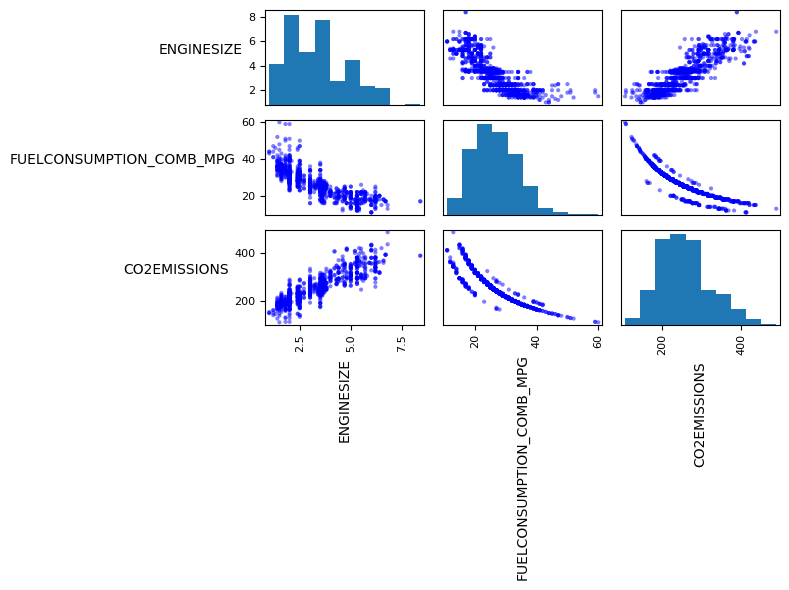

In [7]:
# Create scatter matrix to visualize relationships
print("\nGenerating scatter matrix visualization...")
sm = pd.plotting.scatter_matrix(df_selected, alpha=0.5, c='blue', figsize=(8, 6))

# Rotate axis labels for better readability
for ax in sm.ravel():
    ax.set_xlabel(ax.get_xlabel(), rotation=90)
    ax.set_ylabel(ax.get_ylabel(), rotation=0, ha='right')

plt.tight_layout()
plt.show()

# 7. DATA EXTRACTION AND PREPROCESSING

In [8]:
# Extract features (X) and target variable (y)
X = df_selected.iloc[:, [0, 1]].to_numpy()  # Features: ENGINESIZE, FUELCONSUMPTION_COMB_MPG
y = df_selected.iloc[:, [2]].to_numpy()     # Target: CO2EMISSIONS

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")


Feature matrix shape: (1067, 2)
Target vector shape: (1067, 1)


# 8. FEATURE SCALING

In [10]:
# Standardize features to have mean=0 and std=1
# This prevents features with larger magnitudes from dominating the model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

print("\nFeature scaling applied:")
print("Scaled features statistics:")
print(pd.DataFrame(X_scale).describe().round(2))


Feature scaling applied:
Scaled features statistics:
             0        1
count  1067.00  1067.00
mean      0.00    -0.00
std       1.00     1.00
min      -1.66    -2.07
25%      -0.95    -0.73
50%       0.04    -0.06
75%       0.67     0.61
max       3.57     4.50


# 9. TRAIN-TEST SPLIT

In [11]:
# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scale, y, test_size=0.2, random_state=42
)

print(f"\nTrain set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")



Train set size: 853 samples
Test set size: 214 samples


# 10. MODEL TRAINING

In [12]:
# Create and train Multiple Linear Regression model
mlr = LinearRegression()
mlr.fit(X_train, y_train)

# Extract model parameters
coef = mlr.coef_           # Coefficients for scaled features
intercept = mlr.intercept_ # Intercept term

print(f"\nModel Parameters (Scaled Features):")
print(f"Coefficients: {coef}")
print(f"Intercept: {intercept}")


Model Parameters (Scaled Features):
Coefficients: [[ 25.27339614 -37.4381472 ]]
Intercept: [256.29072488]


# 11. COEFFICIENT TRANSFORMATION TO ORIGINAL SCALE

In [13]:
# Transform coefficients back to original feature scale for interpretation
std_devs_ = scaler.scale_  # Standard deviations used for scaling
means = scaler.mean_       # Means used for scaling

# Calculate original scale coefficients
coef_orig = coef / std_devs_
intercept_orig = intercept - np.sum((means * coef) / std_devs_)

print(f"\nModel Parameters (Original Scale):")
print(f"Original Coefficients: {coef_orig}")
print(f"Original Intercept: {intercept_orig}")



Model Parameters (Original Scale):
Original Coefficients: [[17.8581369  -5.01502179]]
Original Intercept: [329.1363967]


# 12. MODEL PREDICTIONS

In [14]:
# Make predictions on test set
y_pred = mlr.predict(X_test)

print(f"\nPredictions generated for {len(y_pred)} test samples")


Predictions generated for 214 test samples


# 13. 3D VISUALIZATION

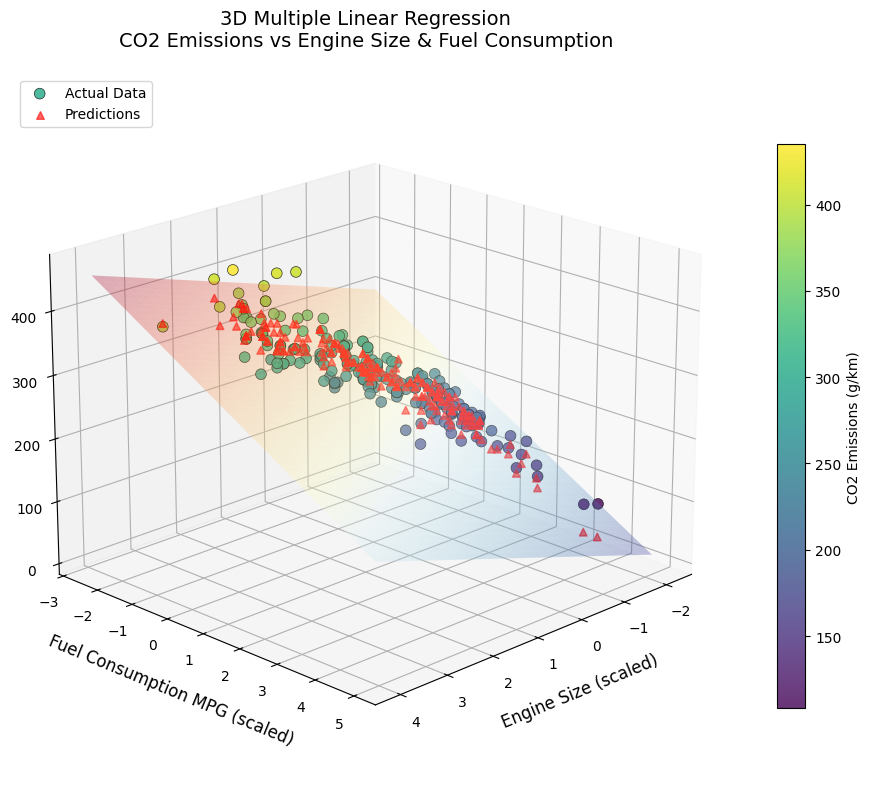

In [15]:
# 3D Visualization of Multiple Linear Regression - Enhanced Version

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for 3D plot
X1 = X_test[:, 0]  # Engine Size (scaled)
X2 = X_test[:, 1]  # Fuel Consumption MPG (scaled)
Y = y_test.flatten()  # CO2 Emissions

# Create fine grid for smooth plane visualization
x1_range = np.linspace(X1.min() - 0.5, X1.max() + 0.5, 50)
x2_range = np.linspace(X2.min() - 0.5, X2.max() + 0.5, 50)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

# Calculate plane values using model coefficients
y_grid = mlr.intercept_[0] + mlr.coef_[0, 0] * x1_grid + mlr.coef_[0, 1] * x2_grid

# Make predictions for test data
y_pred = mlr.predict(X_test)

# Create the 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot actual data points
scatter = ax.scatter(X1, X2, Y, c=Y, cmap='viridis', s=60, alpha=0.8, 
                    edgecolors='black', linewidth=0.5, label='Actual Data')

# Plot regression plane with enhanced appearance
plane = ax.plot_surface(x1_grid, x2_grid, y_grid, 
                       cmap='RdYlBu_r', alpha=0.3, 
                       linewidth=0, antialiased=True)

# Add predicted points on the plane
ax.scatter(X1, X2, y_pred.flatten(), c='red', s=30, alpha=0.6, 
          marker='^', label='Predictions')

# Customize the plot
ax.set_xlabel('Engine Size (scaled)', fontsize=12, labelpad=10)
ax.set_ylabel('Fuel Consumption MPG (scaled)', fontsize=12, labelpad=10)
ax.set_zlabel('CO2 Emissions (g/km)', fontsize=12, labelpad=10)
ax.set_title('3D Multiple Linear Regression\nCO2 Emissions vs Engine Size & Fuel Consumption', 
             fontsize=14, pad=20)

# Add colorbar for the data points
cbar = plt.colorbar(scatter, ax=ax, shrink=0.8, aspect=20)
cbar.set_label('CO2 Emissions (g/km)', fontsize=10)

# Set viewing angle for better perspective
ax.view_init(elev=20, azim=45)

# Add legend
ax.legend(loc='upper left', fontsize=10)

# Add grid for better readability
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# 14. 2D VISUALIZATIONS - INDIVIDUAL FEATURES

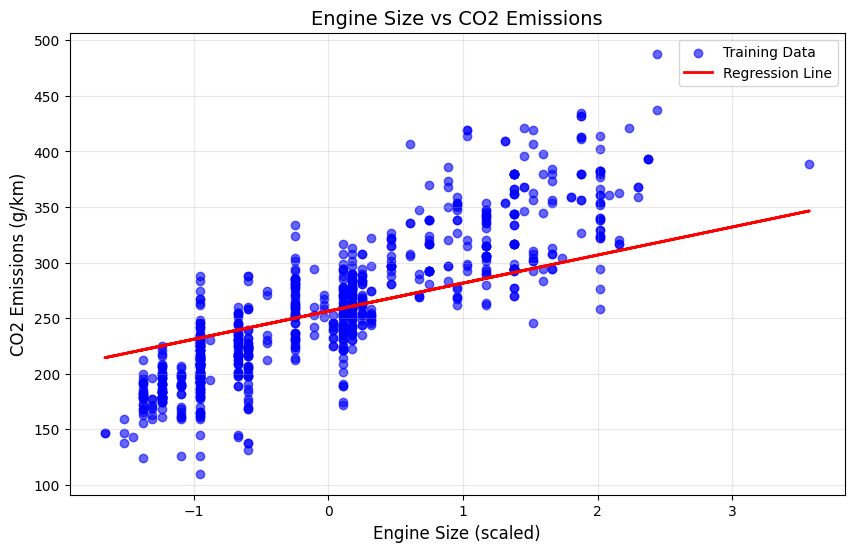

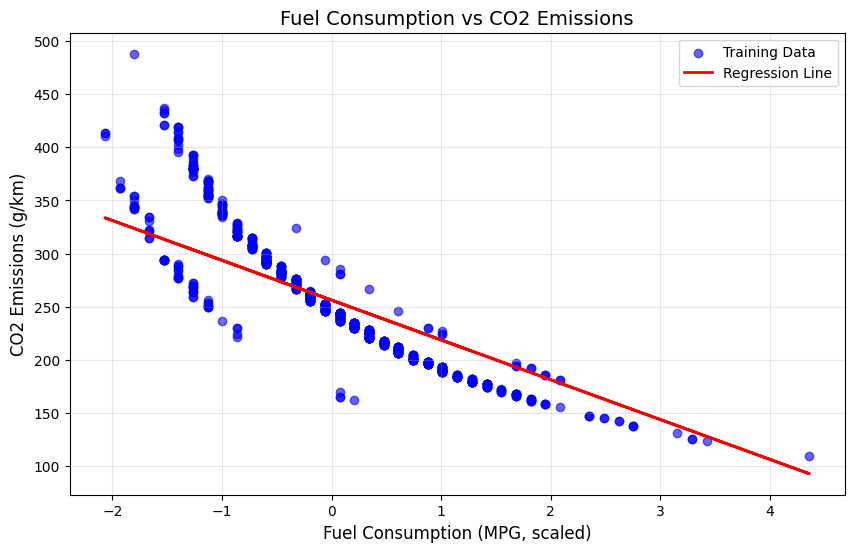

In [16]:
# Plot Engine Size vs CO2 Emissions
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], y_train, c='blue', alpha=0.6, label='Training Data')
plt.plot(X_train[:, 0], intercept[0] + coef[0, 0] * X_train[:, 0], 
         c='red', linewidth=2, label='Regression Line')
plt.xlabel('Engine Size (scaled)', fontsize=12)
plt.ylabel('CO2 Emissions (g/km)', fontsize=12)
plt.title('Engine Size vs CO2 Emissions', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Plot Fuel Consumption vs CO2 Emissions
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 1], y_train, c='blue', alpha=0.6, label='Training Data')
plt.plot(X_train[:, 1], intercept[0] + coef[0, 1] * X_train[:, 1], 
         c='red', linewidth=2, label='Regression Line')
plt.xlabel('Fuel Consumption (MPG, scaled)', fontsize=12)
plt.ylabel('CO2 Emissions (g/km)', fontsize=12)
plt.title('Fuel Consumption vs CO2 Emissions', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 15. MODEL EVALUATION

In [17]:
# Calculate performance metrics
r2_score_value = r2_score(y_test, y_pred)
mse_value = mean_squared_error(y_test, y_pred)
rmse_value = np.sqrt(mse_value)

print("\n" + "="*60)
print("MODEL PERFORMANCE EVALUATION")
print("="*60)
print(f"R² Score: {r2_score_value:.4f}")
print(f"  - Interpretation: {r2_score_value*100:.2f}% of variance explained")
print(f"Mean Squared Error (MSE): {mse_value:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_value:.2f}")
print(f"  - Average prediction error: ±{rmse_value:.2f} g/km")

# Model interpretation
print("\n" + "="*60)
print("MODEL INTERPRETATION")
print("="*60)
print("Linear Regression Equation (Original Scale):")
print(f"CO2_Emissions = {intercept_orig[0]:.2f} + {coef_orig[0][0]:.2f} * EngineSize + {coef_orig[0][1]:.2f} * FuelConsumption_MPG")
print(f"\nCoefficient Interpretation:")
print(f"• Engine Size: {coef_orig[0][0]:.2f} g/km per unit increase")
print(f"• Fuel Consumption (MPG): {coef_orig[0][1]:.2f} g/km per unit increase")
print("="*60)


MODEL PERFORMANCE EVALUATION
R² Score: 0.8873
  - Interpretation: 88.73% of variance explained
Mean Squared Error (MSE): 466.11
Root Mean Squared Error (RMSE): 21.59
  - Average prediction error: ±21.59 g/km

MODEL INTERPRETATION
Linear Regression Equation (Original Scale):
CO2_Emissions = 329.14 + 17.86 * EngineSize + -5.02 * FuelConsumption_MPG

Coefficient Interpretation:
• Engine Size: 17.86 g/km per unit increase
• Fuel Consumption (MPG): -5.02 g/km per unit increase
